In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [69]:
img = cv2.imread("9.png")

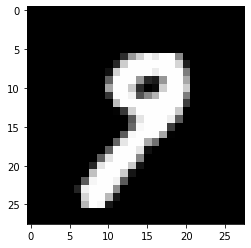

In [70]:
plt.imshow(img[:,:,::-1])

In [71]:
inpWidth = 28      # Width of network's input image
inpHeight = 28     # Height of network's input image

# resize image 
img = cv2.resize(img, (inpHeight, inpWidth))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# construct a blob from the image to forward pass it to EAST model
blob = cv2.dnn.blobFromImage(img, 1.0, (inpWidth, inpHeight),
	(0, 0, 0), swapRB=True, crop=False)

In [72]:
img.shape, blob.shape

((28, 28), (1, 1, 28, 28))

In [73]:
log_res_model = "fused_graph.pb"
net = cv2.dnn.readNet(log_res_model)

In [74]:
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

In [75]:
layerOutput = net.getUnconnectedOutLayersNames()

In [76]:
layerOutput

['Sigmoid_0004']

In [77]:
net.setInput(blob)
out = net.forward(layerOutput)

In [78]:
def print_result(out, img):
    label = '9' if out[0][0][0] == 1.0 else '4'
    plt.imshow(img, cmap="gray")
    plt.title("Predicted label : %s" % label)
    plt.show()

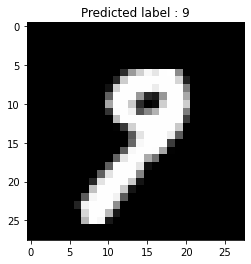

In [79]:
print_result(out, img)